## Neural Network Classification with PyTorch

In [1]:
import torch
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from helper_function import plot_prediction, plot_decision_boundary
import numpy as np
from sklearn.datasets import make_blobs

### 1. Data preparation
Create sample for binary class, multi class and regression data.

1.1 Sample data creation for binary class

In [2]:
# Create binary class data with 2 feature
sample_number = 1000

# Create 1000 sample
x, y = make_circles(sample_number, noise = 0.03, random_state = 42)

In [3]:
# View first 5 from sample of binary class data
print(f"First 5 X features:\n{x[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
# Convert to dataframe
circle = pd.DataFrame({"x1": x[:, 0],
    "x2": x[:, 1],
    "label": y
})

circle.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
# Check count of unique label
circle.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

Noisy data refers to error, irregularity, and corruptions in a dataset. Kindly adjust the parameter 'noise' with 0.1 or even 1 to gain insight/ understand about it.

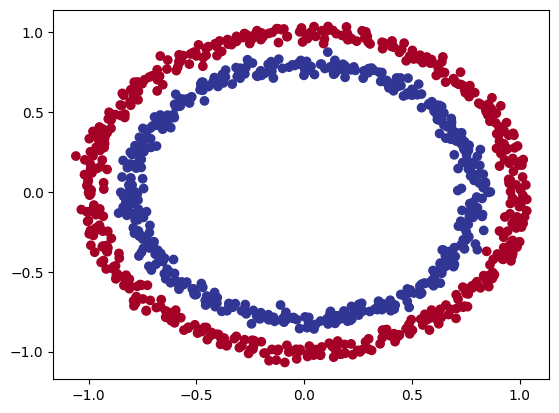

In [6]:
# Plotting binary class of sample data
plt.scatter(x = x[:, 0], y= x[:, 1], 
    c = y, cmap = plt.cm.RdYlBu);

In [7]:
# Check the shape of feature and label
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
# Turn data into tensor
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
# Split data 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    test_size = 0.2, random_state = 42)

len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

1.2 Sample data creation for multi class

In [10]:
# Create multi class data with 2 feature
class_number = 4
feature_number = 2
random_seed = 42

x_blob, y_blob = make_blobs(n_samples = 1000,
    n_features = feature_number,
    centers = class_number,
    cluster_std = 1.5,
    random_state = random_seed
)

# Turn data into tensor
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
    y_blob,
    test_size = 0.2,
    random_state = random_seed
)

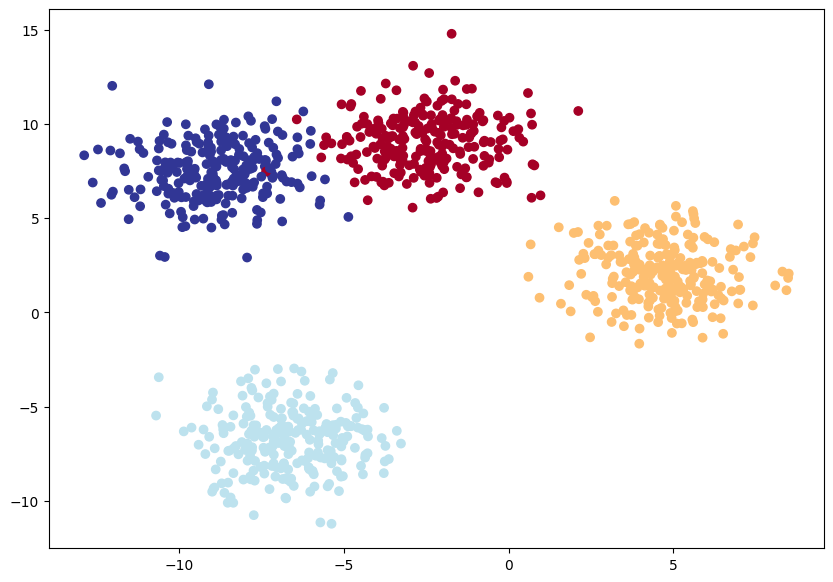

In [11]:
# Plotting multi class sample data 
plt.figure(figsize = (10, 7))
plt.scatter(x_blob[:, 0], x_blob[:, 1],
    c = y_blob, cmap = plt.cm.RdYlBu);

1.3 Sample data creation for regression

In [12]:
# Create regression data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
x_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * x_regression + bias

1.4 Function creation

In [13]:
# Create accuracy calculation function
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    
    return acc

### 2. Model building

In [14]:
# This pc dont have cuda/ gpu, it will return cpu
device = "cuda" if torch.cuda.is_available() else "cpu"

# Construct custom model with pytorch
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Start initialize layers
        # First layer take 2 features from x then produce 5 features
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        # Second layer take 5 features from layer 1 then produce 1 feature
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
    
    # Define forward method
    def forward(self, x):
        # Return the output of layer_2 such as single feature which same shape as y
        # Go through layer 1 (accept input x) first then the output from layer 1 go through layer 2
        return self.layer_2(self.layer_1(x))

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

# Model with non-linear activation function
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        # Add relu activation
        self.relu = nn.ReLU()

    def forward(self, x):
        # Intersperse the relu activation function between layer
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

class MultiClassModelV1(nn.Module):
    def __init__(self, input_feature, output_feature, hidden_unit = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_feature, out_features = hidden_unit),
            nn.Linear(in_features = hidden_unit, out_features = hidden_unit),
            nn.Linear(in_features = hidden_unit, out_features = output_feature),
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [15]:
custom_model = CustomModel().to(device)
custom_model

CustomModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# We can construct model in simple way
first_model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

first_model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Predict without train but there are many false negative an false positive
untrained_y_pred = first_model(x_test.to(device))

print(f"Length of prediction: {len(untrained_y_pred)}, Shape: {untrained_y_pred.shape}")
print(f"Length of test sample: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 prediction:\n{untrained_y_pred[:10]}")
print(f"\nFirst 10 test label:\n{y_test[:10]}")

Length of prediction: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200])

First 10 prediction:
tensor([[0.4910],
        [0.5558],
        [0.3422],
        [0.5331],
        [0.3756],
        [0.4149],
        [0.5708],
        [0.5380],
        [0.3410],
        [0.5605]], grad_fn=<SliceBackward0>)

First 10 test label:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
# Create loss function
# loss_function = nn.BCELoss()
loss_function = nn.BCEWithLogitsLoss()

# Create optimizer
optimizer = torch.optim.SGD(params = first_model.parameters(), lr = 0.1)

In [19]:
# View first 5 output of the forward pass on the test data
print("Input: ", x_test.to(device)[:5])

# After forward pass on test data
y_logit = first_model(x_test.to(device))[:5]
print("After forward pass: ", y_logit)

# Check probability
y_pred_prob = torch.sigmoid(y_logit)
print("Probability: ", y_pred_prob)

Input:  tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]])
After forward pass:  tensor([[0.4910],
        [0.5558],
        [0.3422],
        [0.5331],
        [0.3756]], grad_fn=<SliceBackward0>)
Probability:  tensor([[0.6203],
        [0.6355],
        [0.5847],
        [0.6302],
        [0.5928]], grad_fn=<SigmoidBackward0>)


In [20]:
# If y_pred_prob >= 0.5, y = 1 (class 1)
# If y_pred_prob < 0.5, y = 0 (class 0)
y_pred = torch.round(y_pred_prob).squeeze()
print("After rounding", y_pred)

y_pred_label = torch.round(torch.sigmoid(first_model(x_test.to(device))[:5])).squeeze()
print("What is the label", y_pred_label)

print(torch.eq(y_pred, y_pred_label.squeeze()))

After rounding tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)
What is the label tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)
tensor([True, True, True, True, True])


In [21]:
# First 5 actual test
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
torch.manual_seed(42)

# Set epoch number
epoch_number = 100

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epoch_number):
    # Training model start
    first_model.train()
    
    # Forward train pass
    train_logit = first_model(x_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logit))
    
    # Calculate loss / accuracy
    train_loss = loss_function(train_logit, y_train)
    train_acc = accuracy_function(y_true = y_train, y_pred = train_pred)
    
    # Set optimizer zero grad
    optimizer.zero_grad()
    
    # Set loss backward
    train_loss.backward()
    
    # Set optimizer step
    optimizer.step()
    
    # Evaluation model start
    first_model.eval()
    
    with torch.inference_mode():
        # Forward test pass
        test_logit = first_model(x_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logit))
        
        # Calculate test loss / accuracy
        test_loss = loss_function(test_logit, y_test)
        test_acc = accuracy_function(y_true = y_test, y_pred = test_pred)
    
    # Print out result every 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f} % | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Train loss: 0.71667, Train Accuracy: 50.00 % | Test loss: 0.72033, Test acc: 50.00%
Epoch: 10 | Train loss: 0.70472, Train Accuracy: 50.00 % | Test loss: 0.70759, Test acc: 50.00%
Epoch: 20 | Train loss: 0.69878, Train Accuracy: 50.00 % | Test loss: 0.70108, Test acc: 50.00%
Epoch: 30 | Train loss: 0.69585, Train Accuracy: 50.00 % | Test loss: 0.69773, Test acc: 50.00%
Epoch: 40 | Train loss: 0.69441, Train Accuracy: 50.00 % | Test loss: 0.69601, Test acc: 50.00%
Epoch: 50 | Train loss: 0.69371, Train Accuracy: 50.00 % | Test loss: 0.69511, Test acc: 50.00%
Epoch: 60 | Train loss: 0.69336, Train Accuracy: 50.00 % | Test loss: 0.69464, Test acc: 50.00%
Epoch: 70 | Train loss: 0.69319, Train Accuracy: 59.13 % | Test loss: 0.69440, Test acc: 55.00%
Epoch: 80 | Train loss: 0.69311, Train Accuracy: 53.87 % | Test loss: 0.69427, Test acc: 50.00%
Epoch: 90 | Train loss: 0.69307, Train Accuracy: 53.37 % | Test loss: 0.69421, Test acc: 47.00%


In [23]:
# first_model.to("cpu")

# x, y = x_train.to("cpu"), y_train.to("cpu")

# x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
# y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

# x_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

First model seems to be underfitting issue

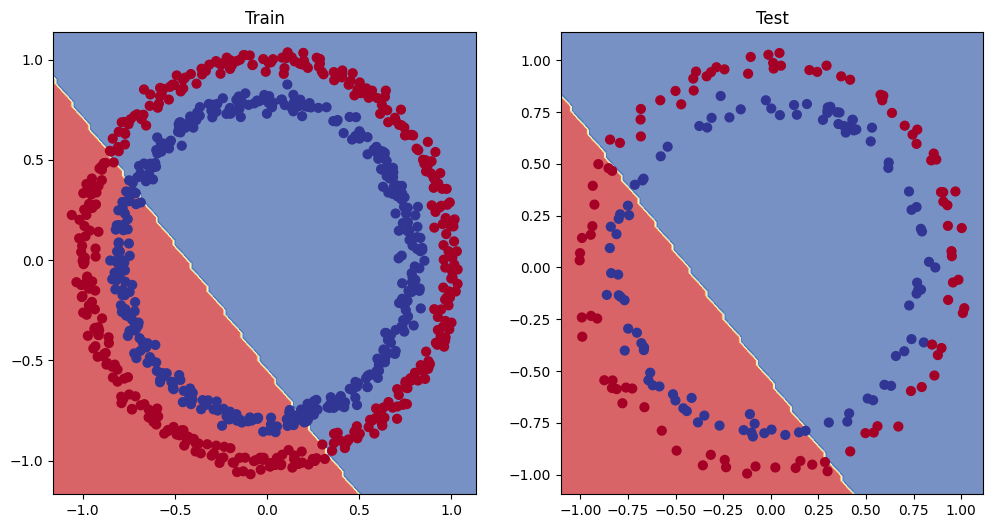

In [24]:
# # Start prediction
# first_model.eval()

# with torch.inference_mode():
#     y_logit = first_model(x_to_pred_on)

# # Switch multi class or binary class based on y
# if len(torch.unique(y)) > 2:
#     # Mutli class
#     y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)  
# else:
#     # Binary class
#     y_pred = torch.round(torch.sigmoid(y_logit))

# y_pred = y_pred.reshape(xx.shape).detach().numpy()

# plt.figure(figsize = (12, 6))

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(first_model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(first_model, x_test, y_test)

Second model

In [25]:
second_model = CircleModelV1().to(device)

loss_function = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(second_model.parameters(), lr = 0.1)

In [26]:
torch.manual_seed(42)

epoch_number = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epoch_number):
    # Start training mode 
    # Forward pass
    y_logit = second_model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))

    # Calculate loss / accuracy
    loss = loss_function(y_logit, y_train)
    acc = accuracy_function(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Start testing mode
    second_model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logit = second_model(x_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logit))
        # Caculate loss / accuracy
        test_loss = loss_function(test_logit, y_test)
        test_acc = accuracy_function(y_true = y_test, y_pred = test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


Second model still unable to learn anything

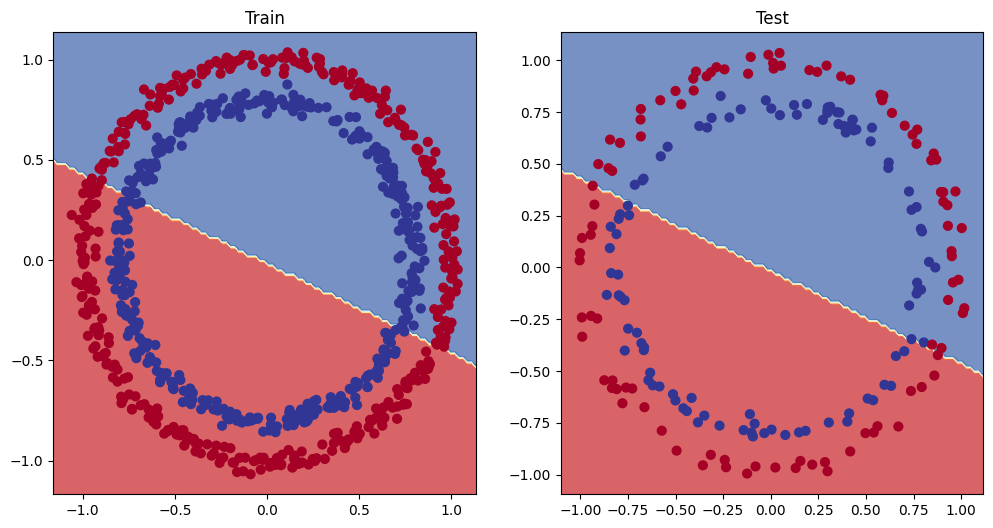

In [27]:
# Plot decision boundary for training and test set
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(second_model, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(second_model, x_test, y_test)

Third model with non-linear function

In [28]:
third_model = CircleModelV2().to(device)

loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(third_model.parameters(), lr = 0.1)

In [29]:
torch.manual_seed(42)

epoch_number = 1200

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epoch_number):
    # Forward pass
    y_logit = third_model(x_train).squeeze()
     # logit -> prediction probability -> prediction label
    y_pred = torch.round(torch.sigmoid(y_logit))

    # Calculate loss and accuracy
    loss = loss_function(y_logit, y_train)
    acc = accuracy_function(y_true = y_train, y_pred = y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Start testing mode
    third_model.eval()
    with torch.inference_mode():
        # Forward pass
        test_logit = third_model(x_test).squeeze()
        # logit -> prediction probability -> prediction label
        test_pred = torch.round(torch.sigmoid(test_logit))
        # Calcuate loss and accuracy
        test_loss = loss_function(test_logit, y_test)
        test_acc = accuracy_function(y_true = y_test, y_pred = test_pred)

        # Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

In [30]:
# Make prediction
third_model.eval()

with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(third_model(x_test))).squeeze()

y_pred[:10], y[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

Third model able to learn with non-linear function

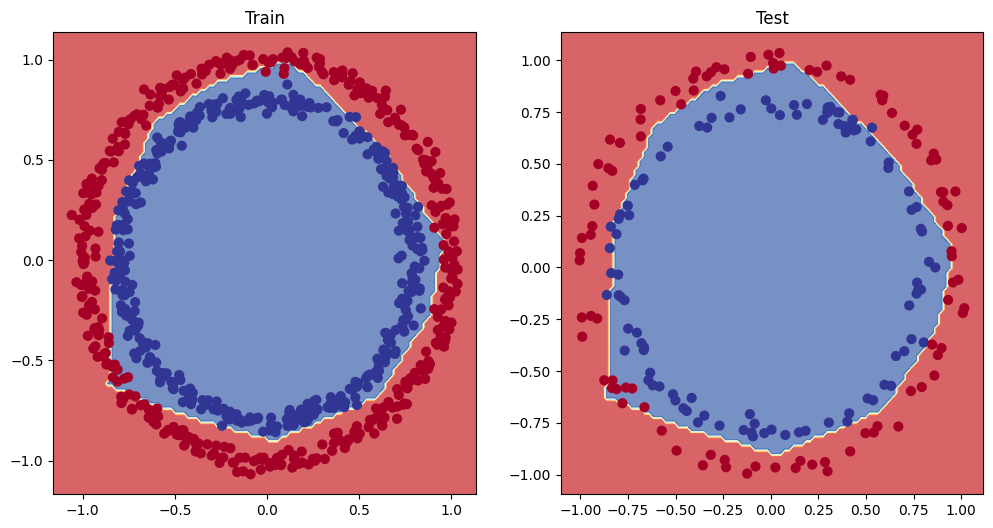

In [31]:
# Plot decision boundary for training and test sets
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(third_model, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(third_model, x_test, y_test)

Forth model

In [32]:
forth_model = MultiClassModelV1(input_feature = feature_number, 
                    output_feature = class_number, 
                    hidden_unit = 8).to(device)
forth_model

MultiClassModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)